In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [3]:
training_features = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/dataset and all/training_set_features.csv")
training_labels = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/dataset and all/training_set_labels.csv")
testing_features = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/dataset and all/test_set_features.csv")

Training Set EDA

In [75]:
training_labels.head()

,respondent_id,xyz_vaccine,seasonal_vaccine
0,0,0,0
1,1,0,1
2,2,0,0
3,3,0,1
4,4,0,0


In [4]:
df = training_features.copy()

In [5]:
df.shape

(26707, 36)

In [6]:
df.head()

,respondent_id,xyz_concern,xyz_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,...,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation
0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,Below Poverty,Not Married,Own,Not in Labor Force,oxchjgsf,Non-MSA,0.0,0.0,NaN,NaN
1,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,...,Below Poverty,Not Married,Rent,Employed,bhuqouqj,"MSA, Not Principle City",0.0,0.0,pxcmvdjn,xgwztkwe
2,2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,"<= $75,000, Above Poverty",Not Married,Own,Employed,qufhixun,"MSA, Not Principle City",2.0,0.0,rucpziij,xtkaffoo
3,3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,Below Poverty,Not Married,Rent,Not in Labor Force,lrircsnp,"MSA, Principle City",0.0,0.0,NaN,NaN
4,4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,"<= $75,000, Above Poverty",Married,Own,Employed,qufhixun,"MSA, Not Principle City",1.0,0.0,wxleyezf,emcorrxb


In [7]:
df.columns

Index(['respondent_id', 'xyz_concern', 'xyz_knowledge',
       'behavioral_antiviral_meds', 'behavioral_avoidance',
       'behavioral_face_mask', 'behavioral_wash_hands',
       'behavioral_large_gatherings', 'behavioral_outside_home',
       'behavioral_touch_face', 'doctor_recc_xyz', 'doctor_recc_seasonal',
       'chronic_med_condition', 'child_under_6_months', 'health_worker',
       'health_insurance', 'opinion_xyz_vacc_effective', 'opinion_xyz_risk',
       'opinion_xyz_sick_from_vacc', 'opinion_seas_vacc_effective',
       'opinion_seas_risk', 'opinion_seas_sick_from_vacc', 'age_group',
       'education', 'race', 'sex', 'income_poverty', 'marital_status',
       'rent_or_own', 'employment_status', 'hhs_geo_region', 'census_msa',
       'household_adults', 'household_children', 'employment_industry',
       'employment_occupation'],
      dtype='object')

In [8]:
df['health_insurance'].value_counts()

health_insurance
1.0    12697
0.0     1736
Name: count, dtype: int64

In [9]:
df['health_insurance'].isnull().sum()

12274

In [10]:
df['health_insurance'].head(10)

0    1.0
1    1.0
2    NaN
3    NaN
4    NaN
5    NaN
6    NaN
7    1.0
8    NaN
9    1.0
Name: health_insurance, dtype: float64

In [11]:
df['race'].value_counts()

race
White                21222
Black                 2118
Hispanic              1755
Other or Multiple     1612
Name: count, dtype: int64

CHecking NULL values

In [12]:
for col in df.columns:
  print(col, df[col].isnull().sum())

respondent_id 0
xyz_concern 92
xyz_knowledge 116
behavioral_antiviral_meds 71
behavioral_avoidance 208
behavioral_face_mask 19
behavioral_wash_hands 42
behavioral_large_gatherings 87
behavioral_outside_home 82
behavioral_touch_face 128
doctor_recc_xyz 2160
doctor_recc_seasonal 2160
chronic_med_condition 971
child_under_6_months 820
health_worker 804
health_insurance 12274
opinion_xyz_vacc_effective 391
opinion_xyz_risk 388
opinion_xyz_sick_from_vacc 395
opinion_seas_vacc_effective 462
opinion_seas_risk 514
opinion_seas_sick_from_vacc 537
age_group 0
education 1407
race 0
sex 0
income_poverty 4423
marital_status 1408
rent_or_own 2042
employment_status 1463
hhs_geo_region 0
census_msa 0
household_adults 249
household_children 249
employment_industry 13330
employment_occupation 13470


Removing columns not necessary for model

In [13]:
df_new = df.drop(columns=['respondent_id',
                          'health_insurance',
                          'employment_industry',
                          'employment_occupation',
                          'income_poverty',
                          'education',
                          'marital_status',
                          'race',
                          'rent_or_own',
                          'household_adults',
                          'household_children',
                          'hhs_geo_region',
                          'age_group',
                          'sex',
                          'employment_status',
                          'census_msa'], axis=1)

In [14]:
df_test_feat = testing_features.drop(columns=['respondent_id',
                          'health_insurance',
                          'employment_industry',
                          'employment_occupation',
                          'income_poverty',
                          'education',
                          'marital_status',
                          'race',
                          'rent_or_own',
                          'household_adults',
                          'household_children',
                          'hhs_geo_region',
                          'age_group',
                          'sex',
                          'employment_status',
                          'census_msa'], axis=1)

Filling null values of with median of each column

In [15]:
df_test_filled_median = df_test_feat.copy()
for col in df_test_feat.columns:
  df_test_filled_median[col] = df_test_feat[col].fillna(df[col].median())

In [16]:
df_test_filled_median.isnull().sum()

xyz_concern                    0
xyz_knowledge                  0
behavioral_antiviral_meds      0
behavioral_avoidance           0
behavioral_face_mask           0
behavioral_wash_hands          0
behavioral_large_gatherings    0
behavioral_outside_home        0
behavioral_touch_face          0
doctor_recc_xyz                0
doctor_recc_seasonal           0
chronic_med_condition          0
child_under_6_months           0
health_worker                  0
opinion_xyz_vacc_effective     0
opinion_xyz_risk               0
opinion_xyz_sick_from_vacc     0
opinion_seas_vacc_effective    0
opinion_seas_risk              0
opinion_seas_sick_from_vacc    0
dtype: int64

In [17]:
test_features = df_test_filled_median.copy()

In [18]:
df_new.shape

(26707, 20)

In [19]:
df_new.head()

,xyz_concern,xyz_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_xyz,doctor_recc_seasonal,chronic_med_condition,child_under_6_months,health_worker,opinion_xyz_vacc_effective,opinion_xyz_risk,opinion_xyz_sick_from_vacc,opinion_seas_vacc_effective,opinion_seas_risk,opinion_seas_sick_from_vacc
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,3.0,1.0,2.0,2.0,1.0,2.0
1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,5.0,4.0,4.0,4.0,2.0,4.0
2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,1.0,0.0,0.0,3.0,1.0,1.0,4.0,1.0,2.0
3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,3.0,3.0,5.0,5.0,4.0,1.0
4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,3.0,3.0,2.0,3.0,1.0,4.0


In [20]:
df_new.isnull().sum()

xyz_concern                      92
xyz_knowledge                   116
behavioral_antiviral_meds        71
behavioral_avoidance            208
behavioral_face_mask             19
behavioral_wash_hands            42
behavioral_large_gatherings      87
behavioral_outside_home          82
behavioral_touch_face           128
doctor_recc_xyz                2160
doctor_recc_seasonal           2160
chronic_med_condition           971
child_under_6_months            820
health_worker                   804
opinion_xyz_vacc_effective      391
opinion_xyz_risk                388
opinion_xyz_sick_from_vacc      395
opinion_seas_vacc_effective     462
opinion_seas_risk               514
opinion_seas_sick_from_vacc     537
dtype: int64

In [21]:
df_filled_median = df_new.copy()
for col in df_new.columns:
  df_filled_median[col] = df[col].fillna(df[col].median())

In [76]:
label_1 = training_labels['xyz_vaccine']
label_2 = training_labels['seasonal_vaccine']

In [23]:
features = df_filled_median.copy()

Normalizing Data

In [24]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
features_std = scaler.fit_transform(features)

In [25]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_auc_score, roc_curve, auc, accuracy_score

Dictionary with all the models that will be tested on the data

In [26]:
models_info = [
    {
        'Model_name': 'Logistic Regression',
        'Model': LogisticRegression(penalty='l2', C=1.0, solver='lbfgs', max_iter=100, random_state=42)
    },

    {
        'Model_name': 'Support vector Classifier',
        'Model': SVC(kernel='rbf', random_state=42)
    },

    {
        'Model_name': 'KNN Classifier',
        'Model': KNeighborsClassifier(n_neighbors=5, weights='distance', algorithm='auto', leaf_size=30, p=2)

    },

    {
        'Model_name': ' Gaussian Naive Bayes Classifier',
        'Model': GaussianNB(var_smoothing=1e-8)
    },

    {
        'Model_name': 'Multinomial Naive Bayes Classifier',
        'Model': MultinomialNB(alpha=0.5)
    },

    {
        'Model_name': 'Bernoulli Naive Bayes Classifier',
        'Model': BernoulliNB(alpha=1.0, binarize=None)
    },

    {
        'Model_name': 'Random Forest Classifier',
        'Model': RandomForestClassifier(n_estimators=100, random_state=42)
    },

    {
        'Model_name': 'Decision Tree Classifier',
        'Model': DecisionTreeClassifier(criterion='gini', max_depth=5, min_samples_split=2, random_state=42)
    }
]

Functions for training and evaluating each model

In [27]:
def model_training(model, features, label):
  model.fit(features, label)
  y_pred = model.predict(features)
  model_acc = accuracy_score(label, y_pred)
  return model_acc

In [28]:
def model_evaluation(model_data, feat, lab_1, lab_2):

  model_performance = {
    'Model_name': [],
    'Accuracy_label_1': [],
    'Accuracy_label_2': []
  }

  for num in range(len(model_data)-1):
    model_performance['Model_name'].append(model_data[num]['Model_name'])
    model_performance['Accuracy_label_1'].append(model_training(model_data[num]['Model'], feat, lab_1))
    model_performance['Accuracy_label_2'].append(model_training(model_data[num]['Model'], feat, lab_2))

  return model_performance

In [77]:
mod_perf = model_evaluation(models_info, features_std, label_1, label_2)

In [78]:
mod_perf_test1 = pd.DataFrame(mod_perf)

Comparing accuracy for each model on both the labels

In [79]:
mod_perf_test1

,Model_name,Accuracy_label_1,Accuracy_label_2
0,Logistic Regression,0.833414,0.753585
1,Support vector Classifier,0.841240,0.765754
2,KNN Classifier,0.980230,0.965140
3,Gaussian Naive Bayes Classifier,0.767776,0.708765
4,Multinomial Naive Bayes Classifier,0.803572,0.683828
5,Bernoulli Naive Bayes Classifier,0.808552,0.708953
6,Random Forest Classifier,0.980230,0.965178


Selecting Random Forest Classifier as the best model with the highest accuracy

In [82]:
def randomForest_mod(feat, lab1, lab2):

  rf_model = models_info[6]['Model']
  rf_model.fit(feat, lab1)
  y_pred_test_lab1 = rf_model.predict_proba(feat)

  rf_model_2 = models_info[6]['Model']
  rf_model_2.fit(feat, lab2)
  y_pred_test_lab2 = rf_model_2.predict_proba(feat)

  return y_pred_test_lab1, y_pred_test_lab2

In [83]:
def roc_auc_scoring(tar_lab, pred_prob, avg):
  roc_auc = roc_auc_score(tar_lab, pred_prob, average=avg)
  print(f"The ROC AUC score taking the avergae parametere to be {avg} is: {roc_auc}")

In [84]:
y_pred_test_lab1, y_pred_test_lab2 = randomForest_mod(features_std, label_1, label_2)

Storing target label values and predicted label probabilities for ROC AUC calculation

In [85]:
target_labels = np.array([label_1, label_2]).T
predicted_probabilities = np.array([y_pred_test_lab1[:, 1], y_pred_test_lab2[:, 1]]).T

In [87]:
roc_auc_scores = roc_auc_score(target_labels, predicted_probabilities, average='macro')
roc_auc_scores = []
for i in range(target_labels.shape[1]):
    roc_auc = roc_auc_score(target_labels[:, i], predicted_probabilities[:, i])
    roc_auc_scores.append(roc_auc)
    print(f"ROC AUC Score for Label {i+1}: {roc_auc:.7f}")

ROC AUC Score for Label 1: 0.9963868
ROC AUC Score for Label 2: 0.9940375


ROC and AUC

In [88]:
fpr, tpr, thresholds = roc_curve(label_1, y_pred_test_lab1[:,1])
roc_auc = auc(fpr, tpr)

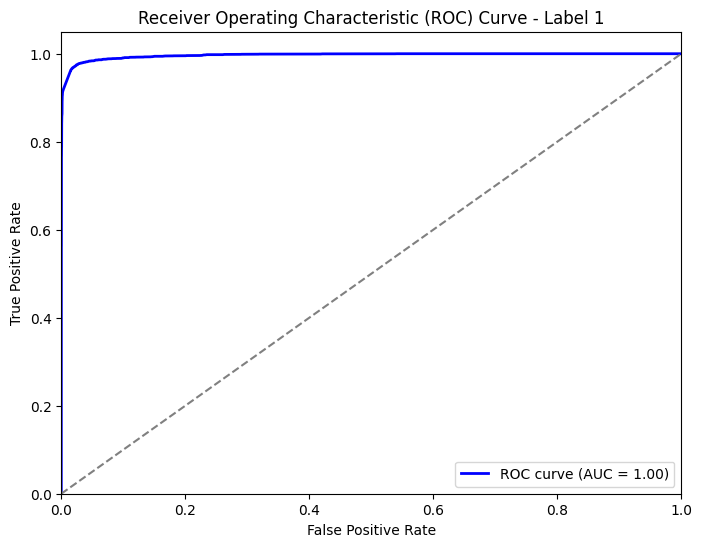

In [89]:
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve - Label 1')
plt.legend(loc='lower right')
plt.show()

In [90]:
fpr1, tpr1, thresholds1 = roc_curve(label_2, y_pred_test_lab2[:,1])
roc_auc1 = auc(fpr1, tpr1)

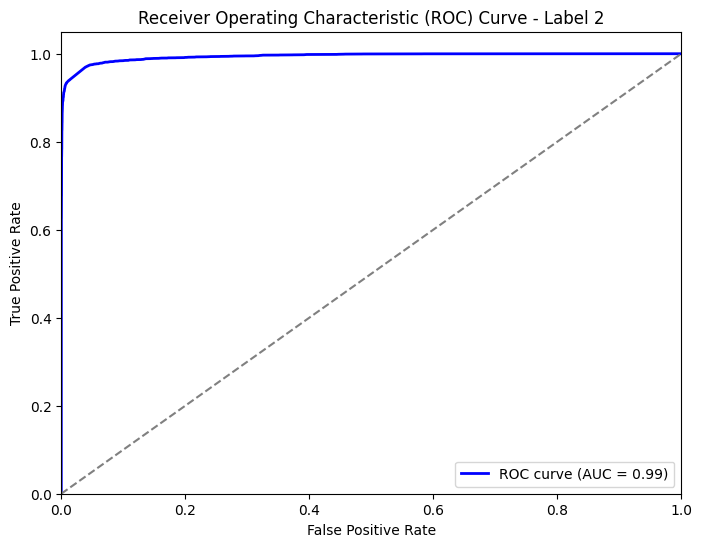

In [91]:
plt.figure(figsize=(8, 6))
plt.plot(fpr1, tpr1, color='blue', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc1)
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve - Label 2')
plt.legend(loc='lower right')
plt.show()

In [92]:
roc_auc_macro_1 = roc_auc_score(label_1, y_pred_test_lab1[:, 1], average='macro')

In [93]:
roc_auc_macro_1

0.9963867897402977

In [94]:
roc_auc_macro_2 = roc_auc_score(label_2, y_pred_test_lab2[:, 1], average='macro')

In [95]:
roc_auc_macro_2

0.9940374814506286

Final ROC AUC score for the stored arrays

In [96]:
roc_auc_scoring(target_labels, predicted_probabilities, 'macro')

The ROC AUC score taking the avergae parametere to be macro is: 0.9952121355954632


Predicting probabilties on testing set features

In [97]:
test_features_std = scaler.transform(test_features)

In [98]:
def randomForest_mod2(train_feat, test_feat, lab1, lab2):

  rf_model = models_info[6]['Model']
  rf_model.fit(train_feat, lab1)
  y_pred_test_lab1 = rf_model.predict_proba(test_feat)

  rf_model_2 = models_info[6]['Model']
  rf_model_2.fit(train_feat, lab2)
  y_pred_test_lab2 = rf_model_2.predict_proba(test_feat)

  return y_pred_test_lab1, y_pred_test_lab2

In [99]:
test_lab1, test_lab2 = randomForest_mod2(features_std, test_features_std, label_1, label_2)

In [107]:
test_sub = {
    'respondant_id': testing_features['respondent_id'],
    'h1n1_vaccine': test_lab1[:, 1],
    'seasonal_vaccine': test_lab2[:, 1]
}

In [108]:
final_test_df = pd.DataFrame(test_sub)

In [109]:
final_test_df.head()

,respondant_id,h1n1_vaccine,seasonal_vaccine
0,26707,0.100000,0.676667
1,26708,0.029995,0.068965
2,26709,0.472500,0.780000
3,26710,0.820167,0.903000
4,26711,0.353333,0.570000


In [110]:
final_test_df.to_csv('final_test_df.csv', index=False)